In [1]:
import numpy as np
import h5py as hp
import seaborn as sbs
from matplotlib import pyplot as plt
from postprocessing_funcs import *
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
sbs.set(rc={'figure.figsize':(8.3, 5.2)}, style='white', palette='colorblind', context='notebook')

In [7]:
folder = '/home/vgubaidulin/PhD/Data_server/Stability_scans/HLLHC/sc/'
real = 0.
imag = 0.
mean_x, mean_z = get_slice_data(real, imag, folder)

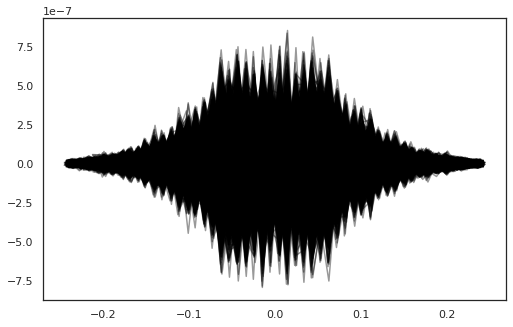

In [9]:
def plot_turn(i, ax):
    ax.plot(mean_z[:,i], mean_x[:, i], color='black', alpha=0.4)
fig, ax = plt.subplots(1, 1)
for turn in range(0, 4000):
    plot_turn(turn, ax)
plt.show()

CPU times: user 59.4 s, sys: 855 ms, total: 1min
Wall time: 1min


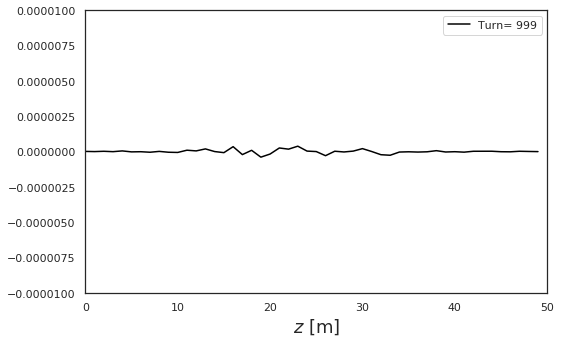

In [15]:
%%time
fig, ax = plt.subplots()
x = mean_x[:, -1000:]
line, = ax.plot([], [], color='black')
# initialization function: plot the background of each frame
def init():
    plt.xlabel('$z$ [m]', fontsize=18)
    line.set_data([], [])
    plt.xlim(0, x[:, 0].shape[0])
    plt.ylim(-1e-5, 1e-5)
    return (line,)
def animate(i):
    line.set_data(range(x[:, i].shape[0]), x[:, i])
    plt.legend((r'Turn={:4d}'.format(i),))
    return (line, )
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(x[0, :].shape[0]), interval=250, blit=True)
HTML(anim.to_html5_video())